In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
def event_happens(occurrence_probability):
    """
    Description: An event happens if a randomly chosen number
                    falls bellow the given occurrence probability 
    Input: probability of occurrence
    Output: 
    """
    return np.random.rand() < occurrence_probability

In [3]:
def lognormal_event_result(lower, upper):
    """
    Description: draws number from lognormal distribution w/ given 
                 lower and upper loss amount within 90% CI
    Input: lower, upper end of 90% CI
    Output: event w lower and upper bounds
    """
    mean = (np.log(lower) + np.log(upper))/2.0
    std_dv = (np.log(upper) - np.log(lower))/3.29 
    return np.random.lognormal(mean, std_dv)

Example(s): 

- Simulate insolvency risk at 9% probability and loss between `$1,000` and `$50,000` (90% CI).
- Simulate liquidation risk at 20% probability and loss between `$1,000` and `$50,000` (90% CI).

In [4]:
i = 0
while i < 20:
    if event_happens(0.09):
        loss_due_to_liquidity_risk = lognormal_event_result(1000, 50000)
        print('Loss due to insolvency was ${:,.2f}'.format(loss_due_to_liquidity_risk))
    else:
        print('A loss due to insolvency did not occur.')
    i += 1

A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
Loss due to insolvency was $2,412.17
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.


In [5]:
i = 0
while i < 20:
    if event_happens(0.2):
        loss_due_to_liquidity_risk = lognormal_event_result(1000, 50000)
        print('Loss due to liquidation was ${:,.2f}'.format(loss_due_to_liquidity_risk))
    else:
        print('A loss due to liquidation did not occur.')
    i += 1

Loss due to liquidation was $7,556.69
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
Loss due to liquidation was $21,149.90
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
Loss due to liquidation was $15,512.72
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
Loss due to liquidation was $6,439.27
A loss due to liquidation did not occur.
Loss due to liquidation was $11,461.57
A loss due to liquidation did not occur.
Loss due to liquidation was $11,119.60
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.


In [26]:


liquidity_risk_events = {
    "Risk": ['Liquidity_Risk_Depositors', 'Liquidity_Risk_Borrowers', 'Insolvencies', 'Liquidations'],
    "Probability": [0.03, 0.02, 0.09, 0.20],
    "Lower": [1000, 1000, 1000, 1000],
    "Upper": [50000, 50000, 50000, 50000]
}

liquidity_risk_events_df = pd.DataFrame(liquidity_risk_events)
liquidity_risk_events_df.head()

,Risk,Probability,Lower,Upper
0,Liquidity_Risk_Depositors,0.03,1000,50000
1,Liquidity_Risk_Borrowers,0.02,1000,50000
2,Insolvencies,0.09,1000,50000
3,Liquidations,0.20,1000,50000


**Note**: Longer risk descriptions are shorten for brevity. These risk definitions are works-in-progress. 

**Liquidity_Risk_Depositors**: Lending pool utilization is pushed to excessive levels (>100%) if large depositor withdraws (e.g., USDC pool utilization gets pushed up if large whale withdraws).

**Liquidity_Risk_Borrowers**: Lending pool utilization is pushed to excessive levels (>100%) if large borrower position gets liquidated (e.g., USDC pool utilization gets pushed up if large whale gets liquidated).

**Insolvencies**: When insolvencies as % of available liquidity is too high. When asset net insolvent value (%), sum net insolvent value / total collateral value, is excessive (e.g., Borrowers who use USDC as collateral become insolvent). 

**Liquidations**: Liquidations as % of available liquidity is too high. (e.g., Multiple borrowers who use USDC as collateral get liquidated). 

In [8]:
# All of the events in the above table can happen in a single year. 
# To simulate a scenario, we need to find out, for each of them, 
# if they happen, how much money it will cost. 

def simulate_scenario(events):
    """
    Description: simulate if events from the liquidity risk events list happens, 
                add up losses due to it. 
    Input: dataframe
    Output: Single loss figure from multiple events. 
    """
    total_loss = 0
    for risk in liquidity_risk_events_df.itertuples():
        if event_happens(risk.Probability):
            total_loss += lognormal_event_result(risk.Lower, risk.Upper)
    return total_loss

simulate_scenario(liquidity_risk_events_df)

14955.845075629919

In [9]:
def monte_carlo(events, iterations):
    annual_losses = []
    for i in range(iterations):
        loss_amount = simulate_scenario(liquidity_risk_events_df)
        annual_losses.append(loss_amount)
    return annual_losses

yearly_losses = monte_carlo(liquidity_risk_events_df, iterations = 1000)
print(yearly_losses)

[0, 0, 0, 0, 0, 0, 3844.5551957423513, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10835.110182217017, 17238.217230800412, 4965.989378298445, 6569.540922369321, 0, 41697.23820701133, 0, 5378.051527586638, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1432.5129121883035, 0, 10156.951507426314, 0, 0, 2785.915639579812, 0, 0, 0, 3627.808727542413, 0, 0, 7449.155611118068, 0, 0, 0, 3378.506908188074, 0, 0, 0, 0, 0, 0, 0, 0, 6302.120967783864, 0, 0, 0, 10555.09371750937, 14649.422278046884, 0, 0, 1925.6139845355485, 0, 0, 0, 0, 5952.244938979572, 0, 12222.86765675544, 0, 4671.740579709618, 26968.148534617467, 0, 4327.21822876063, 0, 0, 941.9868035308443, 4136.902320857568, 0, 0, 0, 0, 0, 0, 0, 0, 4363.229762879253, 0, 0, 0, 0, 0, 11666.815641626798, 0, 0, 0, 6327.904748785977, 0, 0, 0, 0, 0, 0, 1761.4680141946533, 20781.668527890488, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2939.8750749047126, 0, 56656.10023273084, 0, 0, 0, 0, 22421.219110982285, 0, 0, 4105.4509216507395, 0, 0, 5244.32355761971, 0, 0, 0, 0, 25253.93617

In [10]:
# Test Monte Carlo execution time for x number of iterations
# Results in seconds 

import time 

start_time = time.time()
monte_carlo(liquidity_risk_events_df, iterations = 1000)
print(time.time() - start_time)

0.16689300537109375


In [11]:
# Run the Monte Carlo simulation, save results as a pandas Series and numpy array

results = monte_carlo(liquidity_risk_events_df, iterations = 1000)
results_series = pd.Series(results)
results_nparray = np.array(results)
results_series.describe()

results_nparray

array([0.00000000e+00, 0.00000000e+00, 1.17233338e+03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.04852935e+04, 0.00000000e+00, 1.56128777e+04, 3.02899775e+04,
       0.00000000e+00, 1.53426320e+04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.80781756e+02, 9.66028532e+02, 0.00000000e+00,
       0.00000000e+00, 4.75998366e+03, 7.46542570e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.04476719e+04, 0.00000000e+00, 0.00000000e+00, 9.41407922e+02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.14960516e+03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.32558368e+03, 0.00000000e+00,
      

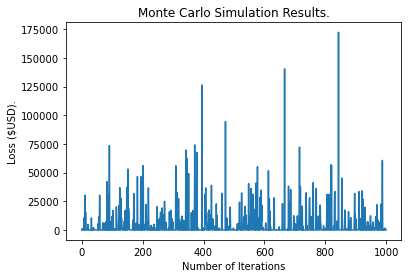

In [12]:
# Plot results in order they came out

results_series.plot()
plt.ticklabel_format(axis='y', style='plain', scilimits=(6,6))
plt.xlabel('Number of Iterations')
plt.ylabel('Loss ($USD).')
plt.title('Monte Carlo Simulation Results.')
plt.show()
# plt.savefig('results-raw.png')

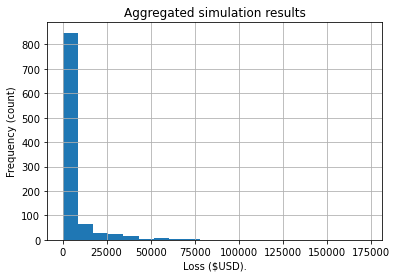

In [13]:
# Aggregate and plot as a histogram

results_series.hist(bins=20)
plt.xlabel('Loss ($USD).')
plt.ylabel('Frequency (count)')
plt.ticklabel_format(axis='x', style='plain', scilimits=(6,6))
plt.title('Aggregated simulation results')
plt.show()
# plt.savefig('results-hist.png')

In [14]:
def plot_lec(results_nparray, label):
    """
    Description: Plot loss exceedance curve from array of Monte Carlo results
    Input: numpy array, string
    Output: plot
    """
    hist, edges = np.histogram(results_nparray, bins=40)
    cumrev = np.cumsum(hist[::-1]*100/len(results_nparray))[::-1]
    plt.plot(edges[:-1], cumrev, label=label)
    plt.xlabel('Loss ($USD)')
    plt.ylabel('Probability of loss or greater (%)')
    plt.ticklabel_format(axis='x', style='plain', scilimits=(6,6))
    plt.title('Loss Exceedance Curve')
    plt.grid()
    #plt.xscale('log')

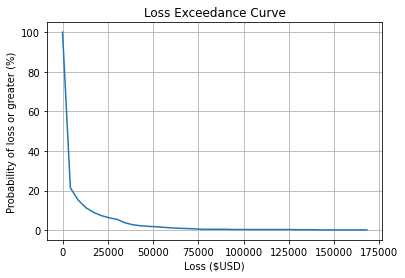

In [15]:
plot_lec(results_nparray, label = 'Inherent Risk')
#plt.savefig('lec-simple.png')

In [16]:
def plot_lec_log(results_nparray, label):
    """
    Description: Plot loss exceedance curve from array of Monte Carlo results
    Input: numpy array, string
    Output: plot
    """
    hist, edges = np.histogram(results_nparray, bins=40)
    cumrev = np.cumsum(hist[::-1]*100/len(results_nparray))[::-1]
    plt.plot(edges[:-1], cumrev, label=label)
    plt.xlabel('Loss ($USD)')
    plt.ylabel('Probability of loss or greater (%)')
    plt.ticklabel_format(axis='x', style='plain', scilimits=(6,6))
    plt.title('Loss Exceedance Curve')
    plt.grid()
    plt.xscale('log')

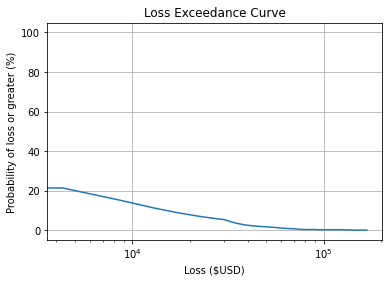

In [17]:
# 10^3 = 1,000
# 10^4 = 10,000
# 10^5 = 100,000
# There's a 20% chance of losing $1,000, 10-12% chance of losing $10,000, (near) 0% chance of losing $100,000

plot_lec_log(results_nparray, label = 'Inherent Risk')

**Risk Tolerance**: 

Quantifying probabilities of events and range of loss is the first step towards *actual decision making*, the next step is to assess risk tolerance.

In [18]:
# Obtain residual risk curve

liquidity_risk_residual = {
    "Risk": ['Liquidity_Risk_Depositors', 'Liquidity_Risk_Borrowers', 'Insolvencies', 'Liquidations'],
    "Probability": [0.02, 0.01, 0.05, 0.1],
    "Lower": [500, 500, 500, 500],
    "Upper": [25000, 25000, 25000, 25000]
}

liquidity_risk_residual_df = pd.DataFrame(liquidity_risk_residual)
liquidity_risk_residual_df.head()

,Risk,Probability,Lower,Upper
0,Liquidity_Risk_Depositors,0.02,500,25000
1,Liquidity_Risk_Borrowers,0.01,500,25000
2,Insolvencies,0.05,500,25000
3,Liquidations,0.10,500,25000


Text(0.5, 1.0, 'Risk Curves')

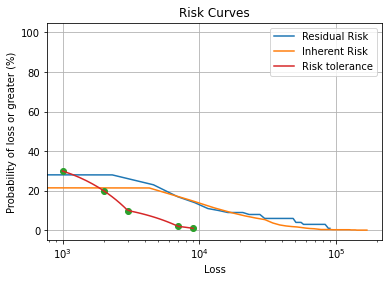

In [19]:
# Obtain residual risk curve cont.

results_residual = monte_carlo(liquidity_risk_residual_df, iterations = 100)

arr_residual = np.array(results_residual)
plot_lec(arr_residual, label = 'Residual Risk')
plot_lec(results_nparray, label = 'Inherent Risk')
plt.xscale('log')
plt.xlabel('Loss')
plt.grid()

# Interpolate the risk tolerance curve
xs = np.array([1,2,3,7,9])*(1e3)
tols = np.array([30,20,10,2,1])

plt.plot(xs, tols, 'o')
xint = np.linspace(min(xs), max(xs))
yint = interpolate.interp1d(xs, tols, kind='slinear')
plt.plot(xint, yint(xint), label='Risk tolerance')
plt.xscale('log')
plt.legend()
plt.title('Risk Curves')
#plt.savefig('risk-curves-together.png')

**Risk measures**

Obtain 5% Value-at-Risk, `VaR` by examining 95th percentile of the distribution.

The value at risk, for all `liquidity_risk_events_df`, according to this simulation, is roughly $30k. 

Furthermore, the **tail value at risk**, `tVaR` can be gotten by averaging the values under value at risk. In case of `VaR` breach, we can expect loss to be approximately $51k. 

In [23]:
var = np.percentile(results_nparray, 95)
var

30976.4493047512

In [25]:
# Tail value at risk, tvar

tvar = np.average(results_nparray[results_nparray >= var])
tvar

51480.09192116895